In [1]:
%matplotlib nbagg
import binascii
import logging

import matplotlib.pyplot as plt
import qcodes as qc
import numpy as np
import qcodes.instrument_drivers.tektronix.TPS2012 as tektps

from time import time

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [2]:
tps = tektps.TPS2012('TPS1', 'ASRL1::INSTR')

Connected to: TEKTRONIX TPS 2012B (serial:0, firmware:CF:91.1CT FV:v11.10) in 1.92s


In [3]:
# For good measures, one may clear out old messages
tps.clear_message_queue()

## SETTING UP AN ACQUISITION
The driver supports basic setting of scales and triggers.

In this example, we want to look at a 10 kHz sine, 100 mVpp with a -50 mV offset.

The sine is on channel **1**, while the sync (0 V to 3 V square wave) signal from the function generator is on channel **2**.

In [4]:
# horizontal
tps.horizontal_scale.set(10e-6)
# channel 1
tps.ch1_scale.set(50e-3)  # V/div
tps.ch1_position.set(2)  # divisions
# channel 2
tps.ch2_scale.set(1)
tps.ch2_position.set(-3)
# trigger
tps.trigger_type.set('EDGE')
tps.trigger_source.set('CH2')
tps.trigger_level.set(1.5)

## ACQUIRING THE CURVES FROM THE OSCILLOSCOPE
There is a simple command to get two arrays for the horizontal and vertical data.

In [9]:
print('[*] Getting curve data...')
xx1, yy1 = tps.ch1_curvedata.get()
print('[+] Got curve data from channel 1')
xx2, yy2 = tps.ch2_curvedata.get()
print('[+] Got curve data from channel 2')

[*] Getting curve data...
[+] Got curve data from channel 1
[+] Got curve data from channel 2


All this can be combined into an exact reproduction of the scope display.

<IPython.core.display.Javascript object>


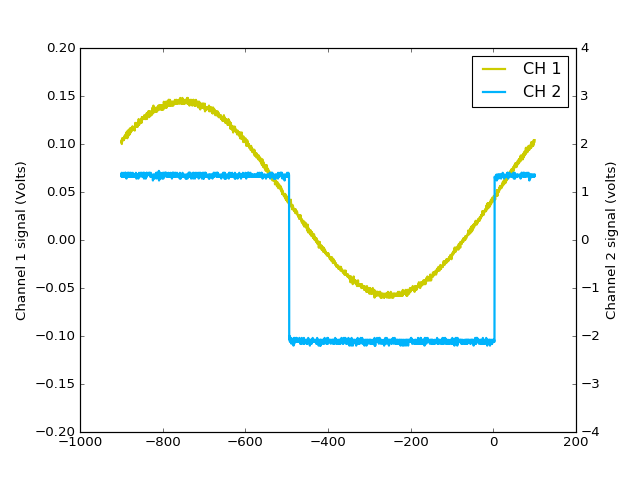

In [5]:
fig = plt.figure()
# Channel 1
ax1 = fig.add_subplot(111)
ch1scale = tps.ch1_scale.get()
ch1pos = tps.ch1_position.get()*ch1scale
ch1plot = ax1.plot(xx1*1e6, yy1+ch1pos, lw=2, color=(0.8, 0.8, 0))
ax1.set_ylabel('Channel 1 signal (Volts)')
ax1.set_ylim([-4*ch1scale, 4*ch1scale])

#Channel 2
ax2 = ax1.twinx()
ax2.yaxis.set_label_position('right')
ch2scale = tps.ch2_scale.get()
ch2pos = tps.ch2_position.get()*ch2scale
ch2plot = ax2.plot(xx2*1e6, yy2+ch2pos, lw=2, color=(0, 0.7, 0.99))
plt.xlabel('Time (microseconds)')
ax2.set_ylim([-4*ch2scale, 4*ch2scale])
ax2.set_ylabel('Channel 2 signal (volts)')
ax2.legend(ch1plot+ch2plot, ['CH 1', 'CH 2'])

In [3]:
tps.close()

NameError: name 'tps' is not defined